## Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.


Min-Max scaling, also known as Min-Max normalization, is a data preprocessing technique used in machine learning to scale numerical features within a specific range, typically between 0 and 1. It is particularly useful when the features in our dataset have different ranges, and we want to bring them all to a common scale without distorting the data's underlying distribution.

In [1]:
#EXAMPLE 
import numpy as np

# Sample dataset
data = np.array([10, 20, 30, 40, 50])

# Calculate the minimum and maximum values
min_value = np.min(data)
max_value = np.max(data)

# Min-Max scaling
scaled_data = (data - min_value) / (max_value - min_value)

print("Original Data:", data)
print("Scaled Data:", scaled_data)


Original Data: [10 20 30 40 50]
Scaled Data: [0.   0.25 0.5  0.75 1.  ]


## Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling? Provide an example to illustrate its application.

A unit vector technique, also known as "Normalization" or "Unit Length Scaling," is a feature scaling method used to transform numerical features in such a way that each feature vector (observation) has a Euclidean norm (length) of 1. This technique is particularly useful when the direction of the feature vector is more important than its magnitude, and it is commonly used in machine learning algorithms like cosine similarity, k-nearest neighbors (KNN), and some dimensionality reduction techniques.

In [2]:
# EXAMPLE
import numpy as np

# Sample dataset (feature vector)
data = np.array([3, 4])

# Calculate the Euclidean norm (length) of the feature vector
norm = np.linalg.norm(data)

# Normalize the feature vector to a unit vector
normalized_data = data / norm

print("Original Data:", data)
print("Normalized Data (Unit Vector):", normalized_data)


Original Data: [3 4]
Normalized Data (Unit Vector): [0.6 0.8]


Differences between Unit Vector Scaling and Min-Max Scaling:

* Range:

Min-Max Scaling scales the data to a specific range (e.g., [0, 1]), while Unit Vector Scaling scales the data to have a length of 1, so it lies on the unit circle.

* Magnitude vs. Direction:

Min-Max Scaling preserves both the magnitude and direction of the data, while Unit Vector Scaling preserves only the direction and sets the magnitude to 1.

* Use Cases:

1. Min-Max Scaling is typically used when we want to standardize the range of features, especially when algorithms are sensitive to feature magnitudes.
2. Unit Vector Scaling is used when we're interested in the direction of the data vectors rather than their magnitude, which is often the case in similarity-based algorithms or when we want to emphasize the relationships between feature vectors regardless of their scale.

## Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and data analysis to reduce the number of features (dimensions) in a dataset while preserving as much of the original variability as possible. PCA achieves this by transforming the original features into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original features and are ordered by the amount of variance they explain. By selecting a subset of the top principal components, we can effectively reduce the dimensionality of our data.

- Here's a step-by-step overview of how PCA works:

1. Standardize the Data: If the original features have different scales, it's essential to standardize them (e.g., by subtracting the mean and dividing by the standard deviation) to ensure that all features are equally important.

2. Compute the Covariance Matrix: Calculate the covariance matrix of the standardized data. The covariance matrix describes the relationships between all pairs of features.

3. Eigenvalue Decomposition: Perform eigenvalue decomposition on the covariance matrix to obtain eigenvalues and eigenvectors. The eigenvectors represent the directions of maximum variance in the data, and the eigenvalues indicate the magnitude of variance along these directions.

4. Select Principal Components: Sort the eigenvalues in descending order and select the top  k eigenvectors corresponding to the highest eigenvalues. These k eigenvectors are the principal components.

5. Transform Data: Project the original data onto the space defined by the selected principal components. This results in a reduced-dimensional representation of the data.

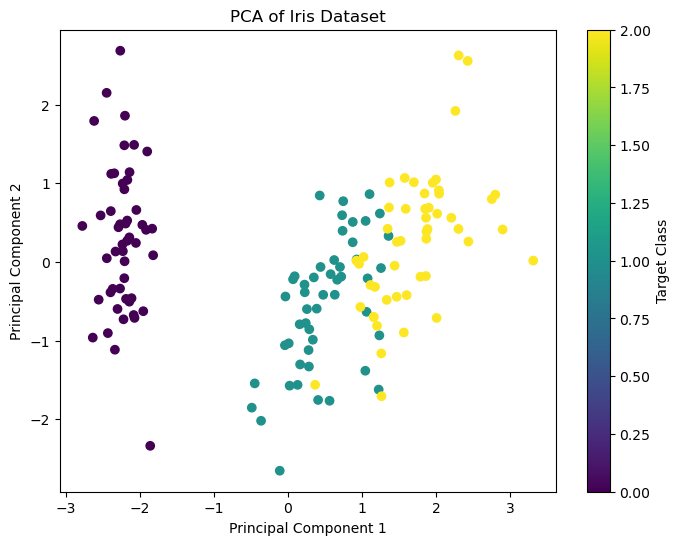

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Target Class')
plt.show()


## Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

PCA (Principal Component Analysis) and feature extraction are closely related concepts in the context of dimensionality reduction and data analysis. PCA can be used as a feature extraction technique to transform high-dimensional data into a lower-dimensional representation while preserving the most significant information in the data. This reduced representation can serve as a set of new features that capture the essential characteristics of the original data.

The relationship between PCA and feature extraction can be summarized as follows:

1. **Dimensionality Reduction:** Both PCA and feature extraction aim to reduce the dimensionality of the data by creating a smaller set of features that retain as much valuable information as possible.

2. **Preserving Variance:** PCA identifies linear combinations of the original features (principal components) in such a way that the first principal component captures the most variance in the data, the second captures the second most, and so on. These principal components effectively summarize the variability in the dataset.

3. **Feature Extraction:** In feature extraction, we create new features by transforming the original features. PCA achieves this transformation by calculating linear combinations of the original features that correspond to the principal components. These linear combinations are the extracted features.

Here's an example of using PCA for feature extraction in Python:



In [1]:
import numpy as np
from sklearn.decomposition import PCA

# Generate synthetic data (4 features)
np.random.seed(0)
X = np.random.randn(100, 4)

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_transformed = pca.fit_transform(X)

# The transformed data now has 2 features instead of 4
print("Original Data Shape:", X.shape)
print("Transformed Data Shape:", X_transformed.shape)

Original Data Shape: (100, 4)
Transformed Data Shape: (100, 2)


## Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to preprocess the data.

In the context of building a recommendation system for a food delivery service using features like price, rating, and delivery time, Min-Max scaling can be applied to preprocess the data. Min-Max scaling will ensure that all these features are on a common scale, typically between 0 and 1, making them comparable and suitable for recommendation algorithms that rely on distance or similarity measures.

##### Here's how you can use Min-Max scaling to preprocess the data:

- Understanding the Data:

First, we need to have a clear understanding of our dataset, including the range and distribution of values for each feature. This will help us decide whether scaling is necessary and how it will impact our recommendation system.

- Data Preparation:

Ensure that our dataset is in a suitable format, such as a pandas DataFrame in Python, where each column represents a feature.

- Min-Max Scaling:

For each feature (price, rating, and delivery time), apply Min-Max scaling independently.
Follow these steps for each feature:
1. Identify the minimum X(min) and X (max).
2. Apply the Min-Max scaling formula to scale each value X in the feature. i.e X(scaled)= [X-X(min)]/ [X(max)-X(min)]
3. Replace the original values in the dataset with their scaled counterparts.

In [2]:
import pandas as pd

# Sample dataset (replace with your actual dataset)
data = pd.DataFrame({
    'price': [10.0, 20.0, 15.0, 25.0, 30.0],
    'rating': [4.5, 3.0, 4.8, 4.2, 3.9],
    'delivery_time': [30, 45, 20, 60, 40]
})

# Min-Max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

# Apply Min-Max scaling to each feature
data['price'] = min_max_scaling(data['price'])
data['rating'] = min_max_scaling(data['rating'])
data['delivery_time'] = min_max_scaling(data['delivery_time'])

print(data)


   price    rating  delivery_time
0   0.00  0.833333          0.250
1   0.50  0.000000          0.625
2   0.25  1.000000          0.000
3   0.75  0.666667          1.000
4   1.00  0.500000          0.500


## Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

###### Using Principal Component Analysis (PCA) to reduce the dimensionality of a dataset containing many features, such as company financial data and market trends for predicting stock prices, can be a valuable preprocessing step. PCA helps to address the curse of dimensionality, reduces noise, and can improve the performance of machine learning models. Here's how we can use PCA in the context of building a stock price prediction model:

1. Data Preparation:

Ensure that our dataset is well-preprocessed, cleaned, and organized. Features should be numerical, and missing values should be handled appropriately.

2. Standardization:

Standardize our features (mean = 0, standard deviation = 1). PCA is sensitive to the scale of the data, so it's crucial to standardize them to ensure that all features contribute equally to the principal components.

3. PCA Application:

Apply PCA to our standardized dataset. The number of principal components we choose to retain depends on our desired level of dimensionality reduction and the explained variance we're willing to accept.

4. Determine the Number of Components:

Typically, we would choose the number of principal components based on the explained variance ratio. The explained variance ratio tells us the proportion of the total variance in the data that is explained by each principal component. We can plot the cumulative explained variance ratio and select the number of components that capture a significant portion of the variance (e.g., 95% or 99%).

5. PCA Transformation:

Transform our standardized dataset using the selected number of principal components. This transformation will result in a new dataset with reduced dimensionality.

6. Model Building:

Use the reduced-dimensional dataset as input for our stock price prediction model. This model can be a regression model, time series forecasting model, or any other suitable machine learning algorithm.

## Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [6]:
import numpy as np

# Sample dataset
data = np.array([1, 5, 10, 15, 20])

# Calculate the minimum and maximum values
min_value = np.min(data)
max_value = np.max(data)

# Min-Max scaling to a range of -1 to 1
scaled_data = -1 + 2 * (data - min_value) / (max_value - min_value)

print("Original Data:", data)
print("Scaled Data (-1 to 1):", scaled_data)


Original Data: [ 1  5 10 15 20]
Scaled Data (-1 to 1): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


## Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Performing feature extraction using PCA on a dataset with features like height, weight, age, gender, and blood pressure is a common technique to reduce dimensionality. The number of principal components you choose to retain depends on the specific goals of your analysis and the explained variance you are willing to accept. Here's a general process for PCA and determining the number of principal components to retain:

- Data Preparation: Ensure that your dataset is well-preprocessed, with any missing values handled appropriately. Also, make sure that categorical features like "gender" are properly encoded (e.g., one-hot encoding).

- Standardization: Standardize your numerical features (height, weight, age, and blood pressure) to have mean 0 and standard deviation 1. This is important for PCA because it's sensitive to the scale of the data.

- PCA Application: Apply PCA to your standardized dataset.

- Explained Variance Ratio: Examine the explained variance ratio for each principal component. The explained variance ratio tells ywe the proportion of the total variance in the data that is explained by each principal component.

Cumulative Explained Variance: Plot the cumulative explained variance ratio as a function of the number of principal components. This plot helps you understand how much variance is retained as you increase the number of components.

Choose the Number of Components: Select the number of principal components based on your desired level of explained variance. Common choices include retaining enough components to explain 95% or 99% of the variance.